In [39]:
#Import Packages
import numpy as np
import polars as pl
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import heapq
import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
#Cancer Networks

#read in sample sheet
ss = pl.read_csv('Ovary/sample_sheet.tsv', separator = '\t')
#print(ss.head())

# Get the list of column names
column_names = ss.columns

#read in dictionary
raw_dict = pl.read_excel('Ovary/dictionary_ids.xlsx', read_options = {"header_row": 1})
print(raw_dict.head())

shape: (5, 2)
┌─────────────────┬──────────────────┐
│ Model id        ┆ TCGA id          │
│ ---             ┆ ---              │
│ str             ┆ str              │
╞═════════════════╪══════════════════╡
│ MODEL1707110006 ┆ TCGA_04_1332_01A │
│ MODEL1707110007 ┆ TCGA_04_1338_01A │
│ MODEL1707110008 ┆ TCGA_04_1341_01A │
│ MODEL1707110009 ┆ TCGA_04_1343_01A │
│ MODEL1707110010 ┆ TCGA_04_1347_01A │
└─────────────────┴──────────────────┘


In [11]:
avg_k_in = []
avg_k_out = []

#Create list of graphs (Tissue specific )
list_graphs = []
for i in range (ss.height):
    filepath = (f"Ovary/Metabolites-based/Metabolites-based_tissue/meanSum_{ss['Sample.ID'][i]}.graphml")
    #print(filepath)

    in_deg = []
    out_deg = []

    g = nx.read_graphml(filepath)
    
    for n, d in g.in_degree():
        in_deg.append(d)
    for n, d in g.out_degree():
        out_deg.append(d)
    
    avg_k_in.append(np.mean(in_deg))
    avg_k_out.append(np.mean(out_deg))

    list_graphs.append(g)
    #print(len(list_graphs))

In [12]:
per_node_in = {}
per_node_out = {}

#Calculate average in and out degree for every node across all graphs
for g in list_graphs:
    for i, n in enumerate(g.nodes()):
        if n not in per_node_in or n not in per_node_out:
            per_node_in[n] = 0
            per_node_out[n] = 0
        per_node_in[n] += g.in_degree(n)
        per_node_out[n] += g.out_degree(n)
    for n in g.nodes():
        per_node_in[n] /= len(list_graphs)
        per_node_out[n] /= len(list_graphs)

test_in = []
test_out = []

#for n, d in enumerate(list_graphs[0].nodes()):
    #test_in.append(list_graphs[0].in_degree(d))
    #test_out.append(list_graphs[0].out_degree(d))

#np.save('test_in.npy', test_in)
#np.save('test_out.npy', test_out)

#Save per_node_in and per_node_out in .npy files
#np.save('per_node_in1.npy', np.array(list(per_node_in.values())))
#np.save('per_node_out1.npy', np.array(list(per_node_out.values())))

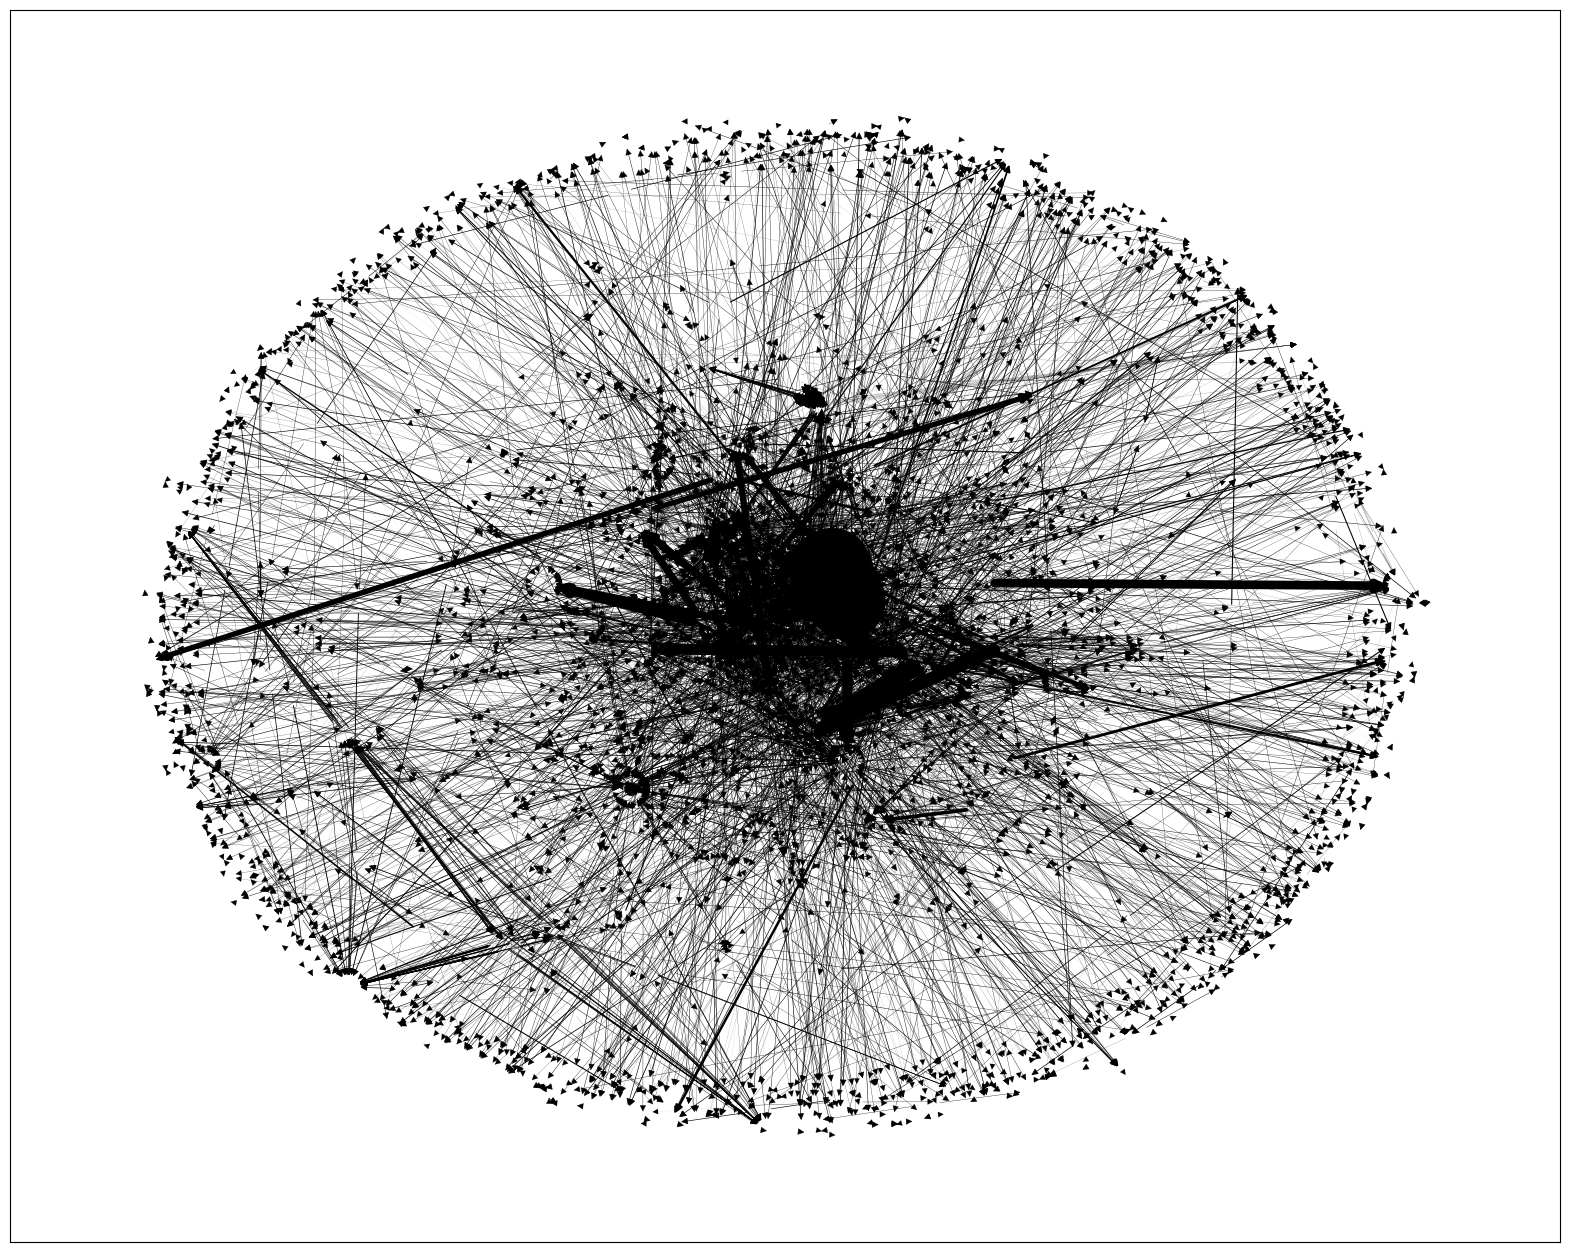

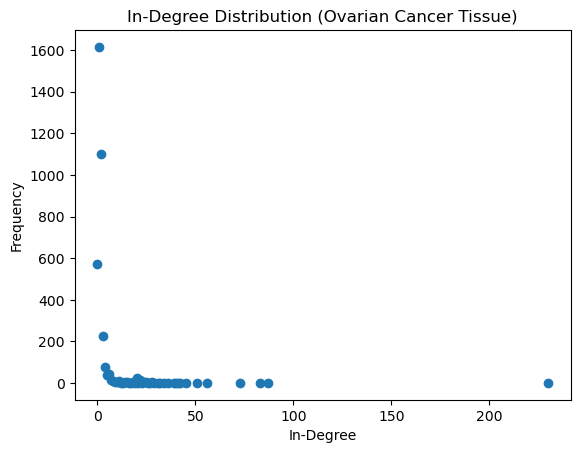

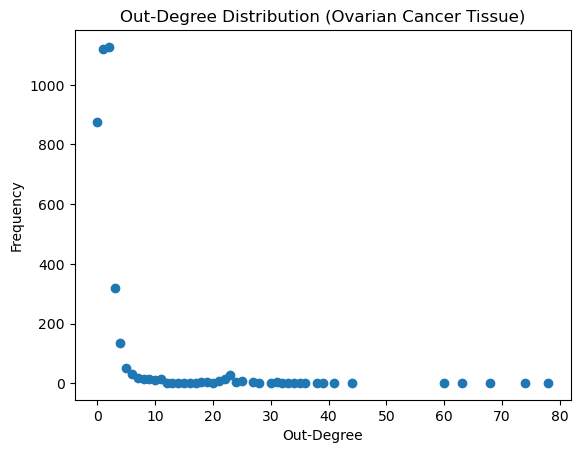

In [48]:
#Single graph test statistics
filepath = (f"Ovary/Metabolites-based/Metabolites-based_tissue/meanSum_TCGA-04-1331-01A.graphml")
G = nx.read_graphml(filepath)

pos = nx.forceatlas2_layout(G, max_iter = 100, scaling_ratio = 0.5, gravity = 0.5, dissuade_hubs=True)
#pos = nx.spring_layout(G, k=1000, iterations=50, method = 'energy', gravity = 0.5, scale = 20)

#nx.draw_networkx_nodes(G, pos, node_size=1)


weights_dict = nx.get_edge_attributes(G, 'weight')
edge_weights = [weights_dict[edge] for edge in G.edges()]

scaled_weights = [w * 0.1 for w in edge_weights]

plt.figure(figsize=(20, 16))
nx.draw_networkx_edges(G, pos, width=scaled_weights)
plt.show()

degrees = [deg for _, deg in G.in_degree()] # For any graph G

vals, freq = np.unique(degrees, return_counts=True)

plt.scatter(vals, freq, marker="o")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")
plt.title("In-Degree Distribution (Ovarian Cancer Tissue)")
plt.show()

degrees = [deg for _, deg in G.out_degree()] # For any graph G

vals, freq = np.unique(degrees, return_counts=True)

plt.scatter(vals, freq, marker="o")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.title("Out-Degree Distribution (Ovarian Cancer Tissue)")
plt.show()

In [26]:
#Basic Network Stats

#Nodes and Edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

print(f"Average in-degree: {np.mean([deg for _, deg in G.in_degree()])}")
print(f"Average out-degree: {np.mean([deg for _, deg in G.out_degree()])}")

#Strongly connected
print(nx.is_strongly_connected(G))

#Node names
node_names = nx.get_node_attributes(G, 'name')
print(node_names)

Number of nodes: 3827
Number of edges: 8533
Average in-degree: 2.2296838254507447
Average out-degree: 2.2296838254507447
False
{'n0': 'm01570s', 'n1': 'm02956s', 'n2': 'm00234s', 'n3': 'm00503c', 'n4': 'm03147s', 'n5': 'm02959s', 'n6': 'm00241s', 'n7': 'm00510c', 'n8': 'm02048s', 'n9': 'm02353s', 'n10': 'm01451s', 'n11': 'm01268n', 'n12': 'm01268c', 'n13': 'm00240c', 'n14': 'm00511c', 'n15': 'm00560c', 'n16': 'm00656c', 'n17': 'm01450c', 'n18': 'm01451c', 'n19': 'm01813c', 'n20': 'm02629c', 'n21': 'm02684c', 'n22': 'm02685c', 'n23': 'm02750c', 'n24': 'm02808c', 'n25': 'm02908c', 'n26': 'm02958c', 'n27': 'm02392c', 'n28': 'm02774c', 'n29': 'm01410s', 'n30': 'm01412c', 'n31': 'm01412m', 'n32': 'm02348c', 'n33': 'm02635m', 'n34': 'm02348m', 'n35': 'm02409c', 'n36': 'm02409m', 'n37': 'm03134s', 'n38': 'm02694c', 'n39': 'm02120s', 'n40': 'm02122c', 'n41': 'm02108s', 'n42': 'm02107c', 'n43': 'm02642s', 'n44': 'm02644c', 'n45': 'm02614s', 'n46': 'm02616c', 'n47': 'm01648s', 'n48': 'm01650c', 

In [56]:
#Centralities
harmonic = nx.harmonic_centrality(G)
weighted_eigen = nx.eigenvector_centrality(G, max_iter=500, weight='weight')
weighted_betweenness = nx.betweenness_centrality(G, weight='weight')
pagerank = nx.pagerank(G, weight='weight')
weighted_degree = {n: d / (len(G)-1) for n, d in G.degree(weight='weight')}

def assign_names(node_dict, name_dict) -> list:
    new_dict = {}
    for key in node_dict.keys():
        if key in name_dict:
            new_dict[name_dict[key]] = node_dict[key]
    new_list = (sorted(new_dict.items(), key=lambda item:item[1], reverse=True))
    return new_list

sorted_degree = assign_names(weighted_degree, node_names)
sorted_harmonic = assign_names(harmonic, node_names)
sorted_eigen = assign_names(weighted_eigen, node_names)
sorted_between = assign_names(weighted_betweenness, node_names)
sorted_pagerank = assign_names(pagerank, node_names)

print(f"Degree Centrality: {sorted_degree}")
print(f"Harmonic Centrality: {sorted_harmonic}")
print(f"Weighted Eigenvector Centrality: {sorted_eigen}")
print(f"Weighted Betweenness Centrality: {sorted_between}")
print(f"Weighted PageRank: {sorted_pagerank}")




Degree Centrality: [('m02519s', 0.4101986121591056), ('m02519c', 0.40893715084659477), ('m01285c', 0.22866373789845038), ('m03106g', 0.1409010714454025), ('m02348c', 0.12455891536562697), ('m02348m', 0.10946352654353256), ('m02348r', 0.10476185572399371), ('m01975c', 0.09892979564632963), ('m02896c', 0.09060933314859257), ('m01261m', 0.08953325226353405), ('m02026c', 0.08693063866791292), ('m01307c', 0.08514393463523103), ('m01986c', 0.08269019796162846), ('m01975s', 0.08103837575610487), ('m02896s', 0.07922395294298183), ('m01628c', 0.07906412867699471), ('m01307s', 0.07862483920919862), ('m01369c', 0.0761842317302666), ('m02471c', 0.07426851026435667), ('m01974c', 0.0738955560789585), ('m03107g', 0.07165101042730578), ('m01986s', 0.0710493012959575), ('m01369s', 0.07095588855201254), ('m02993c', 0.07094423597356209), ('m01628s', 0.06855537194672812), ('m02993s', 0.06699446597878948), ('m03089c', 0.06694445159435443), ('m02471s', 0.06640849162870587), ('m03089s', 0.06420336617877678),

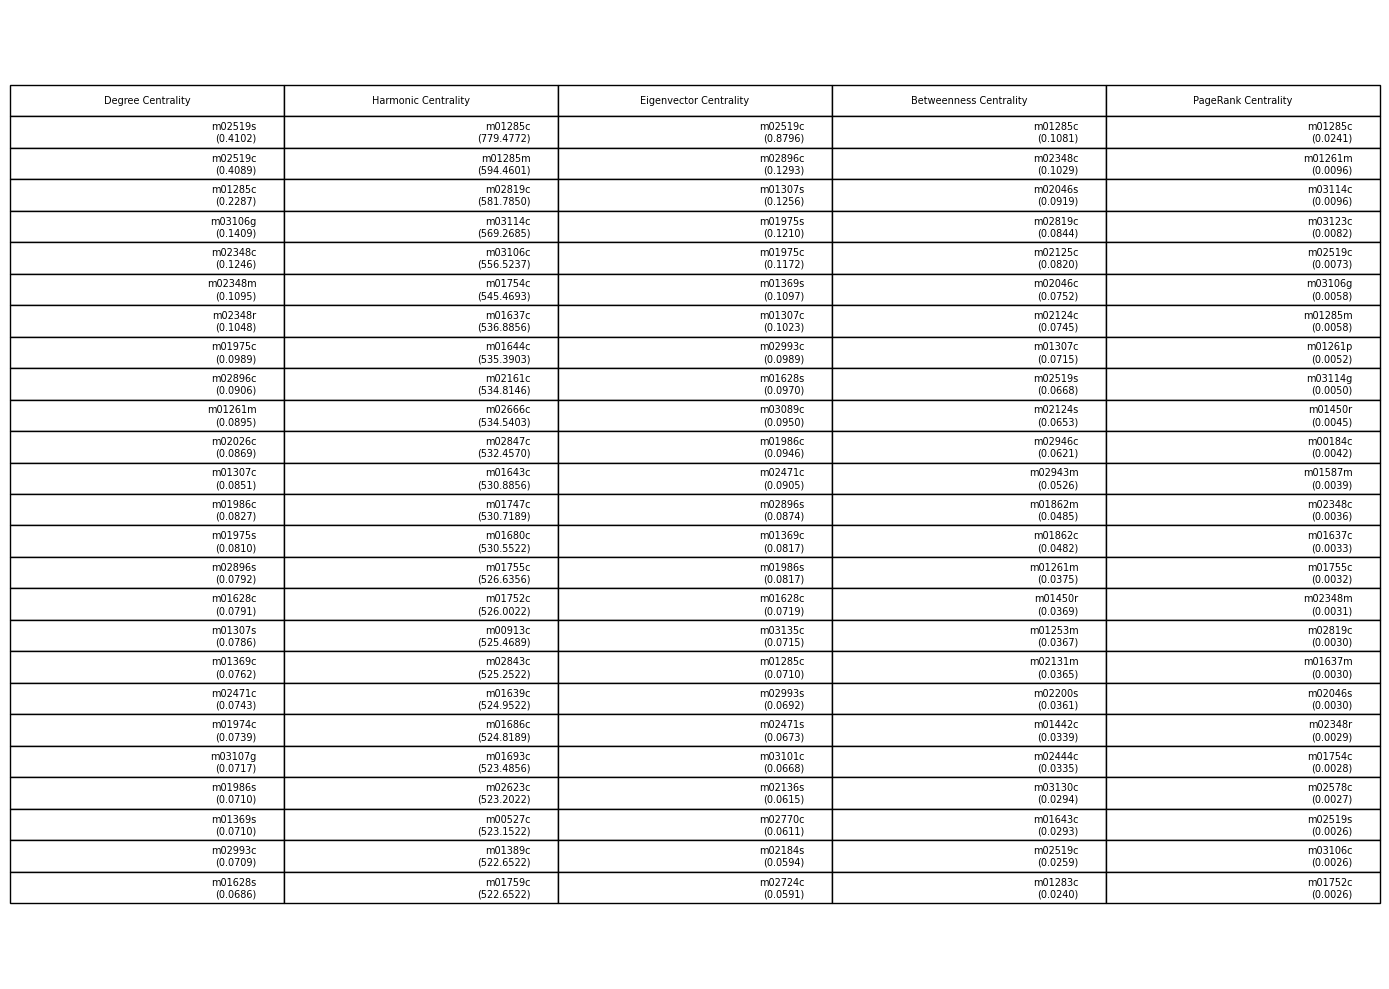

      Degree    Harmonic  Eigenvector  Betweenness  PageRank
0   0.410199  779.477180     0.879610     0.108097  0.024082
1   0.408937  594.460122     0.129253     0.102902  0.009625
2   0.228664  581.784975     0.125605     0.091856  0.009552
3   0.140901  569.268456     0.121018     0.084442  0.008206
4   0.124559  556.523650     0.117151     0.082010  0.007311
5   0.109464  545.469321     0.109697     0.075239  0.005810
6   0.104762  536.885555     0.102308     0.074515  0.005809
7   0.098930  535.390317     0.098921     0.071483  0.005204
8   0.090609  534.814559     0.097047     0.066804  0.005039
9   0.089533  534.540317     0.095049     0.065324  0.004475
10  0.086931  532.456984     0.094637     0.062091  0.004240
11  0.085144  530.885555     0.090512     0.052588  0.003890
12  0.082690  530.718888     0.087433     0.048530  0.003555
13  0.081038  530.552222     0.081709     0.048212  0.003325
14  0.079224  526.635555     0.081670     0.037510  0.003221
15  0.079064  526.002222

'\nax, fig = plt.subplots(figsize = (12,12), nrows = 2, ncols = 3)\nfor j, c in enumerate(centralities):\n    THRESHOLD = 0.1\n    labels = list(c.keys())\n    x = c.keys()\n    y = c.values()\n\n    plt.scatter(x, y, marker = \'o\')\n    for i, value in enumerate(y):\n        if value > THRESHOLD:\n            # Use plt.annotate to add a label for the large value\n            plt.annotate(\n                labels[i],          # The text to display\n                (x[i], y[i]),        # The point (x, y) to annotate\n                textcoords="offset points", # How to position the text\n                xytext=(0, 10),     # Offset text by 10 points vertically\n                ha=\'center\',        # Horizontal alignment\n                fontsize=10,        # Font size for the label\n                color=\'red\'         # Color the label\n            )\n\n    plt.tick_params(labelbottom=False)\n    plt.title(\'Scatter Plot with Labels for Large Values (Threshold > 8.0)\')\n    plt.xla

In [58]:
#Visualize Centralities
largest_degree = [item for item in sorted_degree[:25]]
largest_harmonic = [item for item in sorted_harmonic[:25]]
largest_eigen = [item for item in sorted_eigen[:25]]
largest_between = [item for item in sorted_between[:25]]
largest_pagerank = [item for item in sorted_pagerank[:25]]

centralities = [sorted_degree, sorted_harmonic, sorted_eigen, sorted_between, sorted_pagerank]

# Create data with both names and values
data = []
for i in range(25):
    row = [
        f"{largest_degree[i][0]}\n({largest_degree[i][1]:.4f})",
        f"{largest_harmonic[i][0]}\n({largest_harmonic[i][1]:.4f})",
        f"{largest_eigen[i][0]}\n({largest_eigen[i][1]:.4f})",
        f"{largest_between[i][0]}\n({largest_between[i][1]:.4f})",
        f"{largest_pagerank[i][0]}\n({largest_pagerank[i][1]:.4f})"
    ]
    data.append(row)

headers = ["Degree Centrality", "Harmonic Centrality", "Eigenvector Centrality", "Betweenness Centrality", "PageRank Centrality"]

fig, ax = plt.subplots(figsize = (14, 10))

ax.axis('off')
ax.axis('tight')

cent_table = ax.table(cellText=data, colLabels = headers, loc='center')

#Trying to make this damn thing fit
cent_table.auto_set_font_size(False)
cent_table.set_fontsize(7) 
cent_table.scale(1, 1.5)   

plt.tight_layout()
plt.show()


# Transpose the DataFrame so centrality measures are columns and nodes are rows
centrality_df = centrality_df.T

print(centrality_df)


# Increase the size of the heatmap
#plt.figure(figsize=(12, 6))

# Plot the heatmap
# annot=True displays the numerical value in each cell
# cmap sets the color scheme (e.g., "YlGnBu", "coolwarm", "Reds")
#sns.heatmap(centrality_df, annot=True, cmap='YlGnBu', fmt=".2f")

# Add a title to the heatmap
#plt.title('Centrality Scores Heatmap for ')

# Display the plot
#plt.show()

'''
ax, fig = plt.subplots(figsize = (12,12), nrows = 2, ncols = 3)
for j, c in enumerate(centralities):
    THRESHOLD = 0.1
    labels = list(c.keys())
    x = c.keys()
    y = c.values()

    plt.scatter(x, y, marker = 'o')
    for i, value in enumerate(y):
        if value > THRESHOLD:
            # Use plt.annotate to add a label for the large value
            plt.annotate(
                labels[i],          # The text to display
                (x[i], y[i]),        # The point (x, y) to annotate
                textcoords="offset points", # How to position the text
                xytext=(0, 10),     # Offset text by 10 points vertically
                ha='center',        # Horizontal alignment
                fontsize=10,        # Font size for the label
                color='red'         # Color the label
            )

    plt.tick_params(labelbottom=False)
    plt.title('Scatter Plot with Labels for Large Values (Threshold > 8.0)')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.grid(True)
    plt.show()
'''

k_in; [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 7, 2, 5, 3, 6, 3, 4, 5, 7, 6, 6, 5, 3, 3, 14, 1, 5, 2, 2, 51, 0, 42, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 4, 1, 2, 2, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 3, 1, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 3, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 6, 1, 0, 3, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 11, 0, 1, 2, 1, 1, 1, 1, 3, 0, 8, 5, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 3, 3, 3, 3, 3, 2, 2, 0, 0, 5, 0, 0, 1, 1, 1, 2, 28, 1, 1, 4, 6, 0, 1, 3, 2, 7, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 14, 2, 1, 4, 1, 0, 2, 3, 3, 0, 3, 2, 2, 2, 0, 1, 3, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 3, 

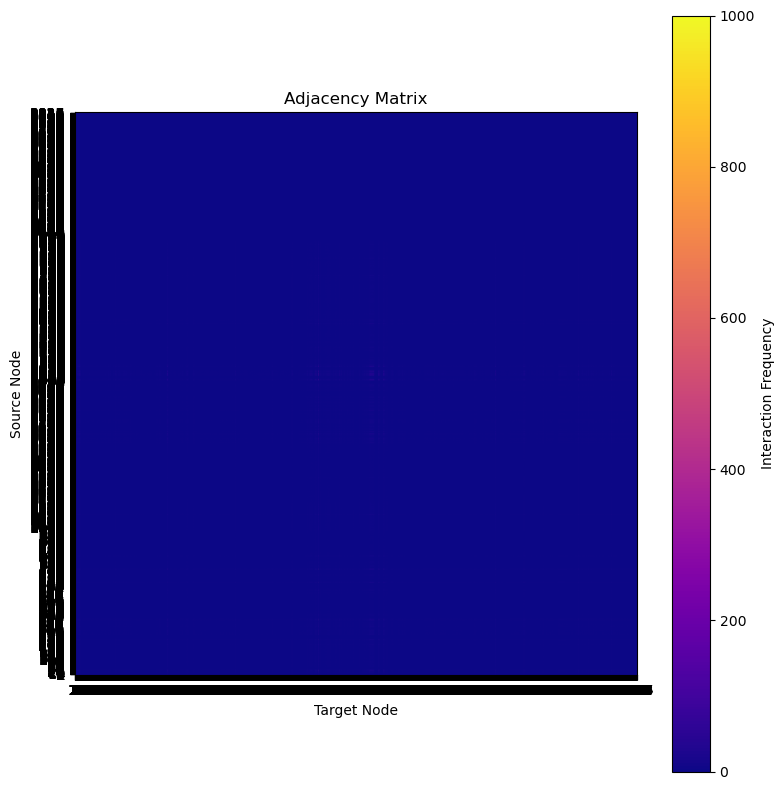

In [30]:
N=1000
def directed_chung_lu(k_out, k_in, random_state=None):
    
    rng = np.random.default_rng(random_state)
    k_out = np.asarray(k_out, dtype=float)
    k_in = np.asarray(k_in, dtype=float)

    n = len(k_out)
    if n != len(k_in):
        raise ValueError("k_out and k_in must have the same length.")
    if np.any(k_out < 0) or np.any(k_in < 0):
        raise ValueError("Degrees must be non-negative.")

    # total degree sum
    total_k = np.sum(k_out + k_in)
    if total_k == 0:
        raise ValueError("Total degree sum cannot be zero.")

    # Compute directed Chung–Lu probabilities
    P = np.outer(k_out, k_in) / total_k

    # Remove self-loops
    np.fill_diagonal(P, 0.0)

    # Cap probabilities to 1 (rare, only if sequences are extreme)
    P = np.clip(P, 0.0, 1.0)

    # Sample edges: Bernoulli trials (no multiedges)
    A = (rng.random(P.shape) < P).astype(np.uint8)

    # Build graph
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    source, target = np.nonzero(A)
    G.add_edges_from(zip(source, target))
    adj_matrix = np.zeros((n,n), dtype = int)
    for i in range(N):
        A = (rng.random(P.shape) < P)
        np.fill_diagonal(A, 0)
        adj_matrix += A.astype(int)
    return adj_matrix

'''
# Example Degree list
k_out = [3,1,2,4]
k_in = [2,3,1,4]
R = directed_chung_lu(l , r)
'''

def plot_full_matrix(adj_matrix, node_labels=None):
    n = adj_matrix.shape[0]

    # Set up figure
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot matrix as a heatmap
    cax = ax.imshow(adj_matrix, cmap='plasma', origin='upper')

    # Add colorbar
    cbar = fig.colorbar(cax, ax=ax)
    cbar.set_label('Interaction Frequency')

    # Label nodes if provided
    if node_labels:
        ax.set_xticks(np.arange(n))
        ax.set_yticks(np.arange(n))
        ax.set_xticklabels(node_labels, rotation=90)
        ax.set_yticklabels(node_labels)
    else:
        ax.set_xticks([])
        ax.set_yticks([])
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels(range(1, n+1))
    ax.set_yticklabels(range(1, n+1))
    ax.invert_yaxis()  # Invert so matrix rows appear top-down
    ax.set_xlabel("Target Node")
    ax.set_ylabel("Source Node")
    ax.set_title("Spy Plot with Opacity Indicating Edge Frequency")
    ax.set_title('Adjacency Matrix')

    plt.tight_layout()
    plt.show()




k_in = [d for n, d in G.in_degree()]
k_out = [d for n, d in G.out_degree()]

print("k_in;", k_in)
print("k_out;" , k_out)

test_in = np.load("/Users/zachskoollaptop/Desktop/UVA/Fall_2025/BIOL4559/GitHub/Final_Project/test_in.npy")
test_out = np.load("/Users/zachskoollaptop/Desktop/UVA/Fall_2025/BIOL4559/GitHub/Final_Project/test_out.npy")

print("test_in;", test_in)
print("test_out;", test_out)
R = directed_chung_lu(k_out, k_in)
plot_full_matrix(R)

In [37]:
#Metabolite Clustering

# Centrality matrix
X = centralities

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster (example: 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
centralities["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualize cluster distribution
sns.scatterplot(
    data=centralities,
    x="WeightedDegree",
    y="WeightedBetweenness",
    hue="Cluster",
    palette="tab10"
)
plt.title("Metabolite clusters based on centralities")
plt.show()


TypeError: 'module' object is not callable